<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Projeto_Petrobras_Multiplas_Saidas_Serie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
base = pd.read_csv('/content/sample_data/petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values
base_valor_maximo = base.iloc[:, 2:3].values

In [0]:
normalizador = MinMaxScaler(feature_range = (0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_valor_maximo_normalizada = normalizador.fit_transform(base_valor_maximo)

In [0]:
previsores = []
preco_real_1 = []
preco_real_2 = []
for i in range(90, len(base_treinamento_normalizada)):
  previsores.append(base_treinamento_normalizada[i - 90: i, 0])
  preco_real_1.append(base_treinamento_normalizada[i, 0])
  preco_real_2.append(base_valor_maximo_normalizada[i, 0])
previsores, preco_real_1, preco_real_2 = np.array(previsores), np.array(preco_real_1), np.array(preco_real_2)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [0]:
preco_real = np.column_stack((preco_real_1, preco_real_2))

In [7]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], previsores.shape[2])))#return_sequences passa a informacao para as proxima camada LSTM
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 2, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])#adam tambem server porem para redes recorrentes o rmsprop pode trazer melhores resultados
regressor.fit(previsores, preco_real, epochs = 30, batch_size = 32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30





1152/1152 [==============================] - 15s 13ms/step - loss: 0.0394 - mean_absolute_error: 0.1455
Epoch 2/30
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0155 - mean_absolute_error: 0.0988
Epoch 3/30
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0147 - mean_absolute_error: 0.0935
Epoch 4/30
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0837
Epoch 5/30
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0106 - mean_absolute_error: 0.0793
Epoch 6/30
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0104 - mean_absolute_error: 0.0774
Epoch 7/30
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0091 - m

In [0]:
base_teste = pd.read_csv('/content/sample_data/petr4_teste.csv')
preco_real_open = base_teste.iloc[:, 1: 2].values
preco_real_high = base_teste.iloc[:, 2: 3].values

In [0]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)#concatena 2 arquivos, axis =0 indica que isto e feito por coluna
entradas = base_completa[len(base_completa) - len(base_teste)- 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

In [0]:
X_teste = []
for i in range(90, len(entradas)):
  X_teste.append(entradas[i-90: i, 0:6])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [0]:
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

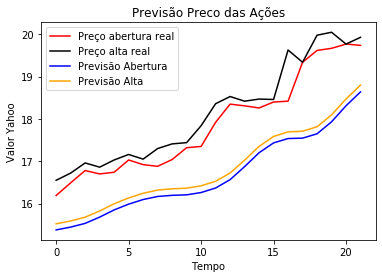

In [18]:
plt.plot(preco_real_open, color = 'red', label = 'Preço abertura real')
plt.plot(preco_real_high, color = 'black', label = 'Preço alta real')
plt.plot(previsoes[:, 0], color = 'blue', label = 'Previsão Abertura')
plt.plot(previsoes[:, 1], color = 'orange', label = 'Previsão Alta')
plt.title('Previsão Preco das Ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()